In [5]:
# Ket noi Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Tăng cường dữ liệu ảnh và tải dữ liệu ảnh
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Tăng cường dữ liệu theo thời gian thực
drive.mount('/content/drive',force_remount=True)
# Cấu hình ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, # chuẩn hóa giá trị điểm ảnh của ảnh để nằm trong khoảng từ 0 đến 1.
                                   shear_range=0.2, # áp dụng ngẫu nhiên các biến đổi cắt.
                                   zoom_range=0.2, # phóng to ngẫu nhiên bên trong các bức ảnh.
                                   horizontal_flip=True) # lật ngẫu nhiên các đầu vào theo chiều ngang.
# Tải và Tiền xử lý Dữ liệu Huấn luyện
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                               target_size=(64,64), # thay đổi kích thước tất cả các ảnh thành 64x64 pixel.
                                               batch_size=32, # chỉ định số mẫu cho mỗi cập nhật gradient.
                                               class_mode ='categorical') # nhãn được cung cấp dưới dạng nhãn mã hóa one-hot 2D.
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 7770 images belonging to 121 classes.
Found 405 images belonging to 121 classes.


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
# Khởi tạo mô hình Sequential
model = Sequential() # cho phép bạn thêm các lớp vào mô hình một cách tuần tự.
# Thêm các lớp tích chập Conv2D để trích xuất đặt trưng
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3))) # Chỉ định kích thước đầu vào cho lớp đầu tiên (ảnh 64x64 với 3 kênh màu).
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) # 32 hoặc 64, 128: Số lượng bộ lọc trong mỗi lớp tích chập.
# Thêm các lớp MaxPooling2D
model.add(MaxPooling2D((2,2))) # Tổng hợp tối đa với kích thước cửa sổ (2x2) để giảm kích thước không gian của đầu ra.
# Thêm các lớp Dropout
model.add(Dropout(0.2)) # Ngắt kết nối ngẫu nhiên 20% của các nơ-ron trong quá trình huấn luyện để giảm hiện tượng quá khớp. (overfitting)
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) # Kích thước của bộ lọc (3x3).
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) # activation='relu': Hàm kích hoạt ReLU.
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) # Khởi tạo trọng số bằng He uniform initialization.
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) # Padding để đảm bảo đầu ra có kích thước tương đương với đầu vào.
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
# Thêm lớp Flatten
model.add(Flatten()) # Chuyển đổi dữ liệu đầu ra từ 2D (ma trận) sang 1D (vector).
# Thêm các lớp Dense
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform')) #Lớp kết nối đầy đủ với 256 nơ-ron.
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform')) #Lớp kết nối đầy đủ với 128 nơ-ron.
model.add(Dropout(0.2))
model.add(Dense(121,activation='softmax')) #Lớp kết nối đầy đủ với 121 nơ-ron, hàm kích hoạt softmax để xác định xác suất của mỗi lớp.
# Hiển thị tóm tắt mô hình
model.summary()
# đầu ra có kích thước 64x64 và 32 kênh (bộ lọc). None đại diện cho số lượng mẫu không xác định, cho phép mô hình xử lý bất kỳ số lượng mẫu nào trong một lần.
# Param #:
# Số lượng tham số có thể huấn luyện trong mỗi lớp. Tham số này là trọng số mà mô hình sẽ học trong quá trình huấn luyện. Ví dụ:
# Conv2D layers: Số bộ lọc nhân với kích thước của mỗi bộ lọc nhân với số kênh đầu vào cộng với một bias cho mỗi bộ lọc.
# Dense layers: Số đầu vào nhân với số nơ-ron trong lớp cộng với một bias cho mỗi nơ-ron.
# Tổng Thống Kê:
# Total params: Tổng số tham số trong mô hình, là 2,432,921 tham số.
# Trainable params: Số lượng tham số có thể huấn luyện, cũng là 2,432,921. Đây là các tham số mà mô hình sẽ tối ưu trong quá trình huấn luyện.
# Non-trainable params: Số lượng tham số không thể huấn luyện, là 0 trong trường hợp này.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

In [8]:
# Biên dịch và huấn luyện mô hình
from tensorflow.keras.optimizers import Adam # Adam, một phương pháp tối ưu hóa dựa trên gradient descent, rất phổ biến trong huấn luyện các mạng nơ-ron sâu vì hiệu quả và tốc độ nhanh trong việc tìm kiếm điểm tối ưu.
# Khởi tạo optimizer Adam với tốc độ học là 0.001. Tốc độ học này là một siêu tham số quan trọng giúp kiểm soát mức độ mô hình cập nhật trọng số mạng sau mỗi lần lặp trong quá trình huấn luyện. Giá trị nhỏ giúp hội tụ chậm và ổn định hơn.
opt = Adam(lr=0.001)
# Biên dịch Mô Hình:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy']) #Biên dịch mô hình với các thông số:
# optimizer=opt: Sử dụng Adam làm phương pháp tối ưu hóa.
# loss='categorical_crossentropy': Sử dụng hàm mất mát phân loại đa lớp, phù hợp cho các bài toán phân loại có nhãn được mã hóa dạng one-hot.
# metrics=['accuracy']: Đánh giá mô hình dựa trên độ chính xác, tức là tỷ lệ phần trăm các dự đoán đúng so với tổng số mẫu.
# Huấn Luyện Mô Hình
history = model.fit(train,batch_size=512,epochs=20,verbose=1,validation_data=test) #Bắt đầu quá trình huấn luyện mô hình với các tham số:
# train: Dữ liệu huấn luyện đã được xử lý và tăng cường qua ImageDataGenerator.
# batch_size=512: Số lượng mẫu dữ liệu trong một lô để huấn luyện. Số này càng lớn thì đòi hỏi bộ nhớ càng nhiều nhưng có thể tăng tốc độ xử lý.
# epochs=150: Số lần lặp toàn bộ bộ dữ liệu huấn luyện qua mạng.
# verbose=1: Hiển thị tiến trình huấn luyện với thanh tiến độ và thông tin chi tiết sau mỗi epoch.
# validation_data=test: Sử dụng bộ dữ liệu kiểm tra để đánh giá mô hình sau mỗi epoch, cho phép theo dõi sự cải thiện và điều chỉnh siêu tham số nếu cần.

Epoch 1/20
243/243 [==============================] - 1822s 7s/step - loss: 4.4380 - accuracy: 0.0413 - val_loss: 3.5855 - val_accuracy: 0.1605
Epoch 2/20
243/243 [==============================] - 287s 1s/step - loss: 2.8226 - accuracy: 0.2561 - val_loss: 1.9775 - val_accuracy: 0.4840
Epoch 3/20
243/243 [==============================] - 283s 1s/step - loss: 1.3942 - accuracy: 0.5642 - val_loss: 1.1709 - val_accuracy: 0.6593
Epoch 4/20
243/243 [==============================] - 282s 1s/step - loss: 0.8568 - accuracy: 0.7154 - val_loss: 0.7482 - val_accuracy: 0.7728
Epoch 5/20
243/243 [==============================] - 281s 1s/step - loss: 0.5792 - accuracy: 0.7925 - val_loss: 0.7209 - val_accuracy: 0.7704
Epoch 6/20
243/243 [==============================] - 282s 1s/step - loss: 0.4549 - accuracy: 0.8261 - val_loss: 0.6899 - val_accuracy: 0.7951
Epoch 7/20
243/243 [==============================] - 279s 1s/step - loss: 0.3772 - accuracy: 0.8483 - val_loss: 0.7047 - val_accuracy: 0.790

In [9]:
model.save('CNN_SignTrafficVN.h5') # lưu mô hình hiện tại vào tệp CNN_SignTrafficVN.h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# import matplotlib.pyplot as plt
# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # Evaluate the model
# score = model.evaluate(test, verbose=0)
# # Phương thức evaluate của mô hình được sử dụng để đánh giá hiệu suất của mô hình trên bộ dữ liệu kiểm tra.
# # Biến score sẽ chứa hai giá trị: mất mát (loss) và độ chính xác (accuracy).
#  # verbose=0 có nghĩa là không hiển thị thông tin chi tiết trong quá trình đánh giá
# print('Test loss= ',score[0]) # In giá trị mất mát của mô hình trên bộ dữ liệu kiểm tra.
# print('Test accuracy= ',score[1]) # In giá trị độ chính xác của mô hình trên bộ dữ liệu kiểm tra.
# plt.plot(history.history['accuracy']) # Vẽ đường biểu diễn sự thay đổi của độ chính xác trên tập huấn luyện qua các kỳ.
# plt.plot(history.history['val_accuracy']) # Vẽ đường biểu diễn sự thay đổi của độ chính xác trên tập kiểm tra qua các kỳ.
# plt.title('Model Accuracy') # Đặt tiêu đề cho biểu đồ.
# plt.ylabel('accuracy') # Đặt nhãn cho trục tung là "accuracy".
# plt.xlabel('epoch') # Đặt nhãn cho trục hoành là "epoch".
# plt.legend(['train','validation'],loc='upper left') # Thêm chú giải cho biểu đồ, với nhãn "train" cho dữ liệu huấn luyện và "validation" cho dữ liệu kiểm tra, đặt chú giải ở góc trên bên trái.

In [11]:
import pandas as pd
clases = pd.read_csv('/content/drive/MyDrive/Dataset/class.csv')
# Chuyển đổi DataFrame thành danh sách:
# Phương thức list() được sử dụng để chuyển các tên cột của DataFrame thành một danh sách Python. Đây là cách để lấy danh sách tên các lớp hoặc các nhãn nếu class.csv chứa các tên lớp hoặc nhãn cho dữ liệu.
clases = list(clases)
# trả về danh sách các tên cột của DataFrame lưu trữ trong biến clases.
clases

['Duong Cam',
 'Cam Di Nguoc Chieu',
 'Cam O To',
 ' Cam O To Re Phai',
 'Cam O To Re Trai',
 'Cam Xe May',
 'Cam O To Va Xe May',
 'Cam Xe Tai',
 'Cam Xe Tai Tren 2.5 tan',
 ' Cam O To Khach Va O To',
 'Cam O To Ro-Mooc',
 'Cam May Keo',
 'Cam Xe Dap',
 'Cam Xe Dap Tho',
 'Cam Xe 3 va 4 Banh Tho So',
 'Cam Nguoi Di Bo',
 'Cam Xe Keo Day',
 'Cam Xe Suc Vat Keo',
 'Han Che Trong Luong Xe',
 'Han Che Trong Luong Truc Xe',
 'Han Che Chieu Cao Xe',
 'Han Che Chieu Rong Xe',
 'Han Che Chieu Dai O To',
 'Han Che Chieu Dai Ro-Mooc',
 'Khoang Cach Toi Thieu Giua Hai Xe',
 'Dung Lai',
 'Cam Re Trai',
 'Cam Re phai',
 'Cam Quay Dau',
 'Cam O To Quay Dau',
 'Cam Vuot',
 'Cam O To Vuot',
 'Toc Do Toi Da',
 'Cam Bop Coi',
 'Tram Thue Quan',
 'Cam Dung Va Do Xe',
 ' Cam Do Xe',
 'Cam Do Xe Ngay Le',
 ' Cam Do Xe Ngay Chan',
 'Nhuong Duong Cho Xe Co Gioi Di Nguoc Chieu Trong Duong Hep',
 'Het Cam Vuot',
 'Het Han Che Toi Da',
 'Het Tat Ca Cac Lenh Cam',
 'Cam Di Thang',
 'Cam Re Trai Va Phai',
 'Cam 

1/1 [==============================] - 0s 191ms/step
Cam Xe Dap


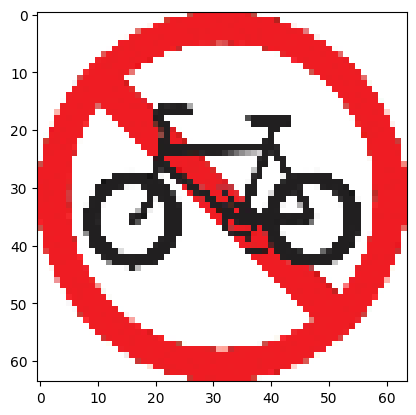

In [12]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/Dataset//Demo/1.jpg', target_size = (64,64)) # Tải hình ảnh 1.JPG và thay đổi kích thước của nó thành (64, 64) pixel.
plt.imshow(img) # Sử dụng matplotlib để hiển thị hình ảnh đã tải.
img = img_to_array(img) # Chuyển hình ảnh đã tải thành một mảng numpy, phù hợp cho việc xử lý và dự đoán bằng mô hình.
img = img.reshape(1,64,64,3) # Thay đổi hình dạng của mảng để tạo một batch duy nhất chứa một hình ảnh (điều này cần thiết vì mô hình CNN kỳ vọng vào dữ liệu đầu vào có hình dạng batch).
img = img.astype('float32') # Chuyển đổi kiểu dữ liệu của mảng thành float32 cho việc tính toán chính xác hơn.
img = img/255 # Chuẩn hóa dữ liệu hình ảnh bằng cách chia cho 255, làm cho giá trị pixel nằm trong khoảng từ 0 đến 1.
# Dự Đoán và Xuất Kết Quả
print(clases[np.argmax(model.predict(img))])
# Dự đoán lớp của hình ảnh sử dụng mô hình đã được huấn luyện. model.predict(img) trả về một mảng các xác suất lớp.
# np.argmax tìm chỉ số của giá trị cao nhất trong mảng xác suất, tương ứng với lớp được dự đoán. clases[...] sử dụng chỉ số này để truy xuất tên lớp tương ứng từ danh sách clases.

Lệnh img = img.reshape(1, 64, 64, 3) trong Python, khi sử dụng thư viện NumPy hoặc trong bối cảnh xử lý dữ liệu hình ảnh với Keras, dùng để thay đổi hình dạng của mảng dữ liệu hình ảnh. Mỗi số trong dãy tham số của phương thức reshape có ý nghĩa riêng, mô tả kích thước của tensor (hoặc mảng nhiều chiều) như sau:
- 1: Số lượng ảnh (hoặc mẫu) trong batch. Trong trường hợp này là 1, tức là bạn đang chuẩn bị dữ liệu cho việc dự đoán một hình ảnh duy nhất. Đây là kích thước batch, và mô hình CNN thường yêu cầu dữ liệu được cung cấp dưới dạng batch, ngay cả khi chỉ có một mẫu duy nhất để xử lý.
- 2: 64 (chiều thứ nhất): Chiều cao của hình ảnh trong pixel. Trong đoạn code này, chiều cao đã được chỉnh sửa để phù hợp với đầu vào của mô hình, là 64 pixel.
- 3: 64 (chiều thứ hai): Chiều rộng của hình ảnh trong pixel. Tương tự như chiều cao, chiều rộng cũng đã được thiết lập là 64 pixel, điều này cần phải phù hợp với kiến trúc mạng nơ-ron đã định nghĩa trước.
- 4: 3 là Số kênh màu trong hình ảnh. Đối với hình ảnh màu, thông số này thường là 3, tương ứng với ba kênh màu RGB (Red, Green, và Blue). Mỗi kênh màu được lưu trữ dưới dạng một ma trận 64x64, và khi kết hợp lại sẽ tạo thành một hình ảnh màu hoàn chỉnh.

Thông qua việc sử dụng phương thức reshape, bạn đảm bảo rằng dữ liệu hình ảnh được định dạng đúng theo yêu cầu của mô hình học sâu, giúp việc xử lý và dự đoán được thực hiện chính xác.

1/1 [==============================] - 0s 35ms/step
Cam O To Re Trai


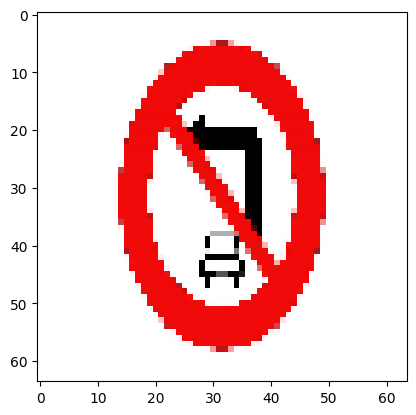

In [13]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/2.png', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 32ms/step
Cam Di Nguoc Chieu


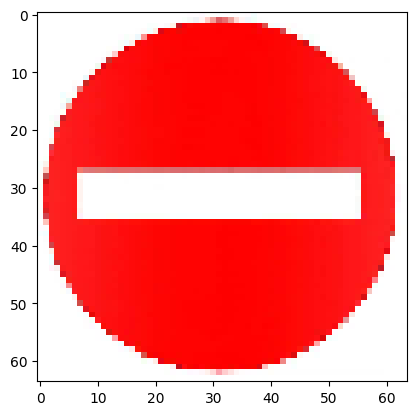

In [14]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/3.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 33ms/step
Giao Nhau Voi Duong Sat Co Rao Chan


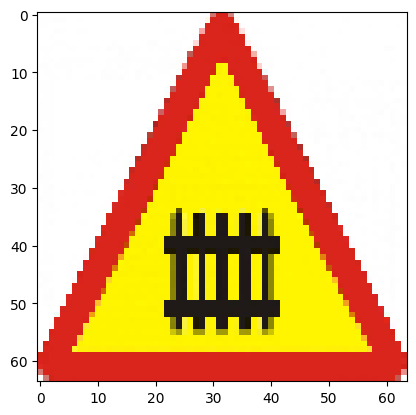

In [15]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/4.png', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 46ms/step
Toc Do Toi Da


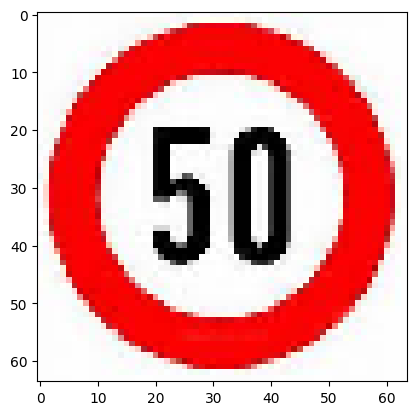

In [16]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/5.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 47ms/step
Het Han Che Toi Da


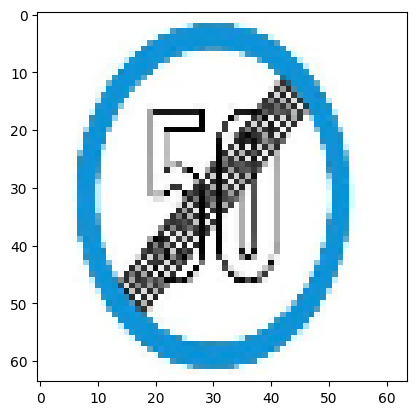

In [17]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/6.png', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 100ms/step
Vong Tranh Ben Phai


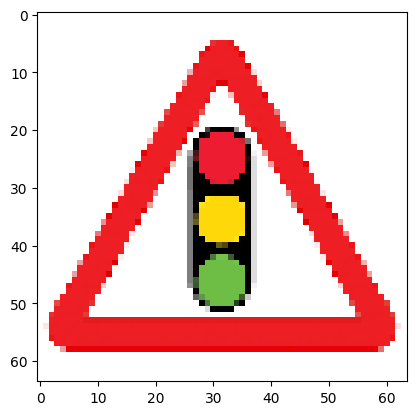

In [18]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/7.png', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 76ms/step
Nguoi Di bo Cat Ngang


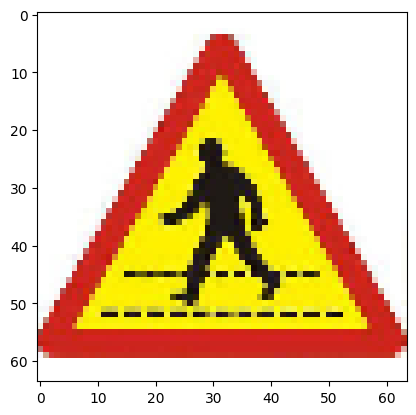

In [19]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/8.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 66ms/step
Noi Giao Nhau Chay Theo Vong Tuyen


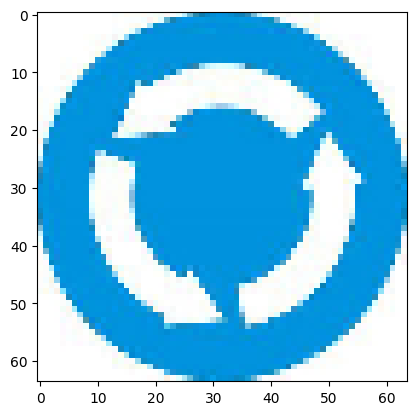

In [20]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/9.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 47ms/step
Cam Re Trai


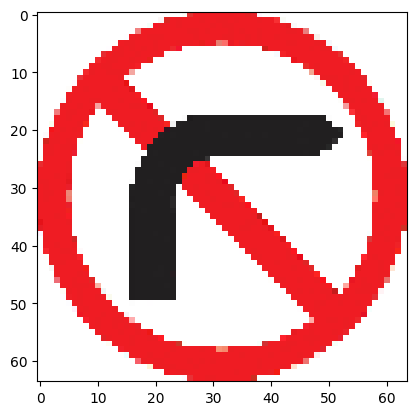

In [21]:
import numpy as np
img = load_img('/content/drive/MyDrive/Dataset//Demo/10.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

# **Tạo web test model bằng hình ảnh**

In [22]:
from keras.models import load_model
import pandas as pd
# Load model Nhận diện
model = load_model("/content/drive/MyDrive/Dataset/CNN_SignTrafficVN.h5")
#load nhãn cho model
classes = pd.read_csv('/content/drive/MyDrive/Dataset/class.csv')
classes = list(classes)

In [23]:
!pip install gradio

import gradio as gr
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s e

In [24]:
def predict_object(img):
  img = img_to_array(img) # Chuyển đổi hình ảnh thành mảng numpy để xử lý
  img = img.reshape(1,64,64,3) # Thay đổi hình dạng ảnh cho phù hợp với đầu vào của mô hình
  print(classes[np.argmax(model.predict(img),axis=1)[0]]) # Lấy chỉ số của lớp có xác suất cao nhất
  prediction= model.predict(img)[0]  # Thực hiện dự đoán bằng mô hình đã tải
  # cf = {classes[i]: float(predict_result[i]) for ỉ in range(len(predict_result))}
  cf = {classes[i]: float(prediction[i]) for i in range(121)} # # Tạo từ điển để lưu trữ các nhãn và xác suất tương ứng
  print(cf)
  return cf

In [25]:
#tạo một giao diện người dùng bằng thư viện gradio
gr.Interface(fn = predict_object,
             inputs = gr.inputs.Image(shape = (64,64)),
             outputs = gr.outputs.Label(num_top_classes=3), #Đầu ra là nhãn của ba lớp có xác suất cao nhất.
             # Được thiết lập là 'default', có nghĩa là Gradio sẽ tự động sử dụng một kỹ thuật giải thích mô hình để cho thấy đầu vào nào là quan trọng nhất đối với dự đoán đầu ra.
             interpretation='default'
             # khởi chạy giao diện, với chế độ debug được bật. Chế độ debug này hữu ích để gỡ lỗi trong quá trình phát triển, vì nó cung cấp thông tin chi tiết hơn về các lỗi hoặc vấn đề.
             ).launch(debug = True)


AttributeError: module 'gradio' has no attribute 'inputs'